# Kecenderungan nilai Matematika untuk gender tertentu di tingkat pendidikan barchelor degree

## Analisis Data

### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Menampilkan dan mencari informasi data

In [2]:
df = pd.read_csv('StudentsPerformance.csv', usecols=['gender','parental level of education','math score'])

In [3]:
df.head()

,gender,parental level of education,math score
0,female,bachelor's degree,72
1,female,some college,69
2,female,master's degree,90
3,male,associate's degree,47
4,male,some college,76


In [4]:
df.shape

(1000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   math score                   1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [6]:
df.describe()

,math score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


In [7]:
df.isnull().sum()

gender                         0
parental level of education    0
math score                     0
dtype: int64

### Menampilkan informasi kolom data dalam bentuk grafik

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

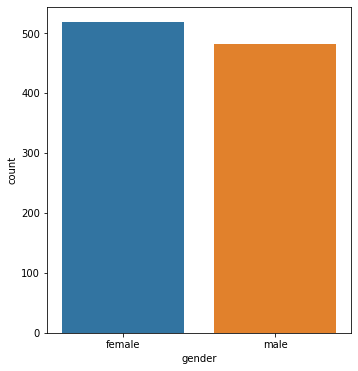

In [8]:
f = plt.figure(figsize=(12,6))

f.add_subplot(1,2,1)
sns.countplot(df['gender'])

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parental level of education', ylabel='count'>

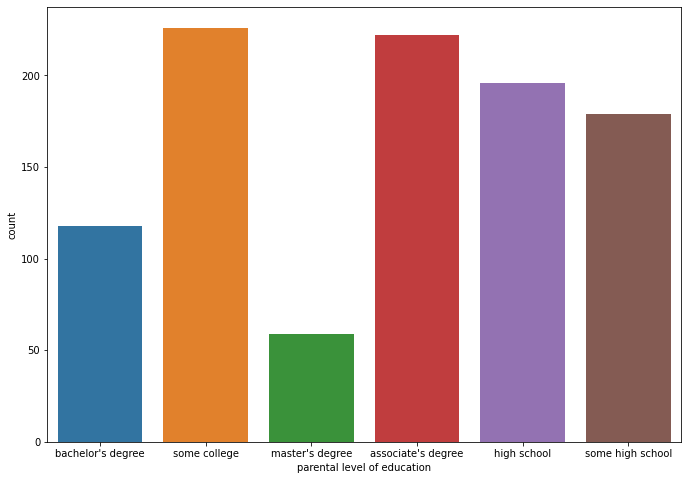

In [9]:
f = plt.figure(figsize=(25,8))

f.add_subplot(1,2,1)
sns.countplot(df['parental level of education'])

<AxesSubplot:ylabel='Density'>

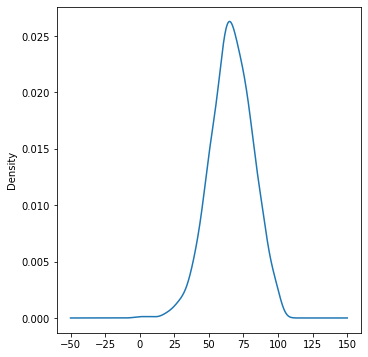

In [10]:
f = plt.figure(figsize=(12,6))

f.add_subplot(1,2,1)
df['math score'].plot(kind='kde')

### Menampilkan informasi keterkaitan independen dan dependen variabel

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2160x576 with 0 Axes>

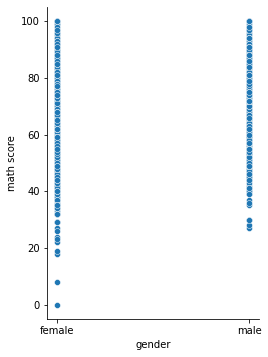

In [11]:
f = plt.figure(figsize=(30,8))
sns.pairplot(data=df, x_vars=['gender'], y_vars=['math score'], size=5, aspect=0.75)
plt.show()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2160x576 with 0 Axes>

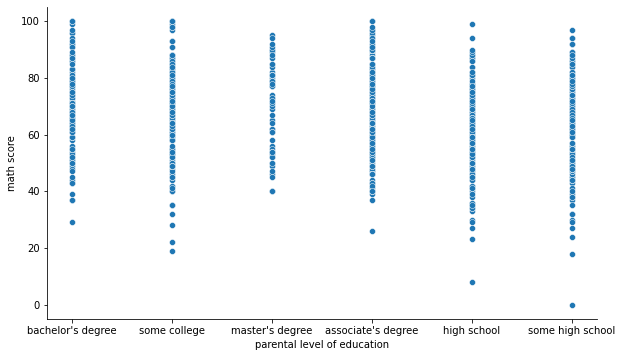

In [12]:
f = plt.figure(figsize=(30,8))
sns.pairplot(data=df, x_vars=['parental level of education'], y_vars=['math score'], size=5, aspect=1.75)
plt.show()

## Modelling Data

In [13]:
df.head()

,gender,parental level of education,math score
0,female,bachelor's degree,72
1,female,some college,69
2,female,master's degree,90
3,male,associate's degree,47
4,male,some college,76


### Mengencoding data kategori menjadi numerik

In [38]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df.head()

,gender,parental level of education,math score
0,0,1,72
1,0,4,69
2,0,3,90
3,1,0,47
4,1,4,76


In [15]:
le.classes_

array(['female', 'male'], dtype=object)

Keterangan :
- Female = 0
- Male = 1

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df.head()

,gender,parental level of education,math score
0,0,1,72
1,0,4,69
2,0,3,90
3,1,0,47
4,1,4,76


In [17]:
le.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype=object)

Keterangan :
- associate's degree = 0
- bachelor's degree = 1
- high school = 2
- master's degree = 3 
- some college = 4 
- some high school = 5

### Untuk mengetahui nilai korelasi dari independen dan dependen variabel

In [18]:
df.corr().style.background_gradient().set_precision(1)

C:\Users\admin\AppData\Local\Temp/ipykernel_4604/2492799808.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(1)


,gender,parental level of education,math score
gender,1.0,0.0,0.2
parental level of education,0.0,1.0,-0.1
math score,0.2,-0.1,1.0


### Data training dan testing 

In [31]:
x = df.drop(columns='math score')
y = df['math score']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
print(lr.coef_)
print(lr.intercept_)

[ 4.32315362 -0.72349066]
65.95187508496366


In [25]:
coef_dict = {
    'features':x.columns,
    'coef_value':lr.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

,features,coef_value
0,gender,4.323154
1,parental level of education,-0.723491


In [26]:
y_pred = lr.predict(x_test)

In [27]:
lr.score(x_test, y_test)

0.047759526319055

In [39]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae) 


Mean Absolute Error (MAE):  11.48014395532092


## Kecenderungan nilai Matematika untuk gender tertentu di tingkat pendidikan barchelor degree

Nilai matematika Female

In [29]:
f = lr.predict([[0, 1]])
f

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65.22838443])

Nilai matematika Male

In [113]:
m = lr.predict([[1, 1]])
m

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69.55153805])